In [1]:
# do_it_pandas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# row - 행, 가로방향 데이터 - 개별데이터 (예 : 학생_김민수, 학생_박준호, 학생_이연아..)
# column - 열 , 세로방향 데이터, feature - 개별데이터의 특성값  (예 : 이름, 나이, 키, 성적, 번호)

In [14]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [17]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [18]:
df.shape

(1704, 6)

In [19]:
type(df)

pandas.core.frame.DataFrame

In [20]:
# 칼럼선택 : df['칼럼명'], df[['칼럼1', '칼럼2', '칼럼3']]

In [21]:
df['lifeExp']

0       28.801
1       30.332
2       31.997
3       34.020
4       36.088
         ...  
1699    62.351
1700    60.377
1701    46.809
1702    39.989
1703    43.487
Name: lifeExp, Length: 1704, dtype: float64

In [22]:
df[['lifeExp', 'year','pop']].head()

,lifeExp,year,pop
0,28.801,1952,8425333
1,30.332,1957,9240934
2,31.997,1962,10267083
3,34.020,1967,11537966
4,36.088,1972,13079460


In [23]:
df[['lifeExp', 'year','pop']].tail(3)

,lifeExp,year,pop
1701,46.809,1997,11404948
1702,39.989,2002,11926563
1703,43.487,2007,12311143


In [24]:
# 0, 99, 999 번째 row를 출력..

In [25]:
df.iloc[['0', '99', '999' ]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


In [ ]:
# 행(row), 열(columns)을 함께 선택하는 경우

# df.iloc[행인덱스, 열인덱스]
# df.loc[행인덱스명, 열칼럼명]

In [26]:
df.loc[100, ['year', 'lifeExp']]

year         1972
lifeExp    45.252
Name: 100, dtype: object

In [27]:
df.iloc[100, [2,3]]

year         1972
lifeExp    45.252
Name: 100, dtype: object

In [28]:
df.iloc[100, 2:4]

year         1972
lifeExp    45.252
Name: 100, dtype: object

In [29]:
df.iloc[[0,99,999], [0,3,5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [30]:
df.loc[[0,99,999], ['country','lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [31]:
# grouping

In [32]:
# 연도별로 평균수명의 평균값을 출력..

In [33]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


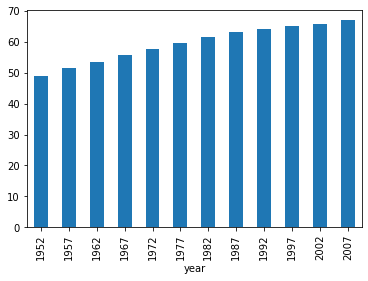

In [35]:
df.groupby('year')['lifeExp'].mean().plot(kind='bar')

In [36]:
grouped = df.groupby('year')
grouped['lifeExp'].agg(np.mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [37]:
# 데이터를 연도, 지역별로 세분화해서 lifeExp, gdpPercap을 출력..
# => 데이터를 연도, 지역별로 세분화해서 묶는다.
# => groupby

In [39]:
df.groupby(['year', 'continent'])[['lifeExp', 'gdpPercap']].mean().head(10)

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455

In [40]:
df.groupby(['year', 'continent'])[['lifeExp']].count()

lifeExp
year continent         
1952 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1957 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1962 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1967 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1972 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1977 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1982 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1987 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1992 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
1997 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
2002 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2
2007 Africa          52
     Americas        25
     Asia            33
     Europe          30
     Oceania          2

In [41]:
s = pd.Series(['banana', 42], index = ['fruit', 'number'])
s

fruit     banana
number        42
dtype: object

In [42]:
scientists = {
    'Name':['Rosaline Franklin','William Gosset'],
    'Occupation':['Chemist','Statician'],
    'Born':['1920-07-25', '1876-06-16'],
    'Died':['1958-04-16','1937-10-16'],
    'Age':[37, 61]
}

df = pd.DataFrame(scientists)
df

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statician,1876-06-16,1937-10-16,61


In [43]:
df.columns

Index(['Name', 'Occupation', 'Born', 'Died', 'Age'], dtype='object')

In [44]:
df.index

RangeIndex(start=0, stop=2, step=1)

In [46]:
df.set_index('Name')
df

,Name,Occupation,Born,Died,Age
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16,37
1,William Gosset,Statician,1876-06-16,1937-10-16,61


In [47]:
df.drop('Age', axis=1, inplace=True)

In [48]:
df

,Name,Occupation,Born,Died
0,Rosaline Franklin,Chemist,1920-07-25,1958-04-16
1,William Gosset,Statician,1876-06-16,1937-10-16


In [50]:
# 날짜 타입 데이터타입으로 변환
df['Born'] = pd.to_datetime(df['Born'])
df['Died'] = pd.to_datetime(df['Born'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Name        2 non-null      object        
 1   Occupation  2 non-null      object        
 2   Born        2 non-null      datetime64[ns]
 3   Died        2 non-null      datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 192.0+ bytes


In [56]:
age=df['Died'].dt.year - df['Born'].dt.year
age

0    0
1    0
dtype: int64

In [62]:
df = pd.read_csv('./data/scientists.csv')
df

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        8 non-null      object
 1   Born        8 non-null      object
 2   Died        8 non-null      object
 3   Age         8 non-null      int64 
 4   Occupation  8 non-null      object
dtypes: int64(1), object(4)
memory usage: 448.0+ bytes


In [63]:
# 평균 나이보다 많은 사람을 출력...


In [67]:
df['Name'][df['Age']>df['Age'].mean()]

1          William Gosset
2    Florence Nightingale
3             Marie Curie
7            Johann Gauss
Name: Name, dtype: object

In [68]:
# broadcasting
# 데이터 간 shpae이 다른 경우, shape의 확장을 통해 shape을 일치시킨다.
# 그 후 연산을 하면 동일한 index의 element끼리 연산을 하게 된다.

In [70]:
type(df['Age'])

pandas.core.series.Series

In [71]:
df['Age']

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [72]:
# 나이가 많은 순으로 데이터를 정리하라..
df.sort_values('Age', ascending =False)

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


In [73]:
df.drop(1, axis=0)   # 원본반영 없음...

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


In [74]:
# scients.csv 파일로 저장.
df.to_csv('scients.csv')

In [75]:
df = pd.read_csv('scients.csv')

In [76]:
# pickle로 저장

In [77]:
df.to_pickle('scients.pickle')

In [78]:
df = pd.read_pickle('scients.pickle')

In [79]:
# tsv 파일로 저장

In [82]:
df.to_csv('scients.tsv', sep='\t')

In [88]:
df = pd.read_csv('scients.tsv', sep='\t')

In [85]:
# ch 5 시각화

In [86]:
# ch 6  - concat, merge

In [ ]:
df1 = pd.read_csv('./data/concat_1.csv')
df2 = pd.read_csv('./data/concat_2.csv')
df3 = pd.read_csv('./data/concat_3.csv')

In [98]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [99]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [100]:
df3

,A,B,C,D
0,a8,b8,c8,d8
1,a9,b9,c9,d9
2,a10,b10,c10,d10
3,a11,b11,c11,d11


In [92]:
# concat을 통해서 세 개의 dataframe을 세로방향과 가로방향으로 병합..
pd.concat([df1, df2, df3], axis=0)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [93]:
pd.concat([df1, df2, df3], axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [94]:
# df1에 새로운 row : [a4, b4, c4, d4]를 추가..

In [117]:
s = pd.Series(['a4', 'b4', 'c4', 'd4'])
s

0    a4
1    b4
2    c4
3    d4
dtype: object

In [118]:
s = pd.DataFrame([s.tolist()], columns = ['A','B','C','D'])
s

,A,B,C,D
0,a4,b4,c4,d4


In [97]:
pd.concat([df1, s])

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4


In [168]:
# ignore_index
pd.concat([df1,df2,df3], axis=0, ignore_index=True)

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7
8,a8,NaN,b8,NaN,NaN,c8,NaN,d8
9,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [169]:
pd.concat([df1, df2, df3], axis=0).reset_index(drop=True)

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7
8,a8,NaN,b8,NaN,NaN,c8,NaN,d8
9,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [111]:
pd.concat([df1, df2,df3], axis=1, ignore_index=True)

,0,1,2,3,4,5,6,7,8,9,10,11
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11


In [113]:
# concat 시 columns명이나 index가 index이름이 서로 다른경우..

In [120]:
df2.columns = ['E', 'F','G','H']
df3.columns = ['A', 'C','F','H']

In [121]:
pd.concat([df1, df2, df3])

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [122]:
# 이름이 동일한 column만 concat...

In [124]:
pd.concat([df2, df3], join='inner')

,F,H
0,b4,d4
1,b5,d5
2,b6,d6
3,b7,d7
0,c8,d8
1,c9,d9
2,c10,d10
3,c11,d11


In [ ]:
# 인덱스가 서로 다른 df를 row방향으로 concat

In [125]:
df1.index = [0,1,2,3]
df2.index = [4,5,6,7]
df3.index = [0,2,5,7]

In [127]:
# 인덱스를 기준으로 동일한 인덱스에 concat된다.
# => 완전하게 concat을 하기 위해서는 index를 통일시켜야 한다..
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,E,F,G,H,A,C,F,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN,a8,b8,c8,d8
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN,a9,b9,c9,d9
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5,a10,b10,c10,d10
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7,a11,b11,c11,d11


In [128]:
pd.concat([df1,df2,df3],axis=1, join='inner')

,A,B,C,D,E,F,G,H,A,C,F,H


In [129]:
pd.concat([df1,df3],axis=1, join='inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [130]:
pd.concat([df2,df3],axis=1, join='inner')

,E,F,G,H,A,C,F,H
5,a5,b5,c5,d5,a10,b10,c10,d10
7,a7,b7,c7,d7,a11,b11,c11,d11


In [131]:
### merge - 특정 칼럼값을 기준으로 merge..

In [136]:
person = pd.read_csv('./data/survey_person.csv')
site = pd.read_csv('./data/survey_site.csv')
survey = pd.read_csv('./data/survey_survey.csv')
visited = pd.read_csv('./data/survey_visited.csv')

In [137]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [138]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [140]:
survey.head(3)

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80


In [143]:
visited_subset = visited.loc[[0,2,6], :]

In [144]:
# visited_subset과 site를 merge

In [152]:
pd.merge(site,visited_subset, left_on ='name' ,right_on = 'site')

,name,lat,long,ident,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-3,-47.15,-126.72,734,DR-3,1939-01-07
2,MSK-4,-48.87,-123.40,837,MSK-4,1932-01-14


In [153]:
# visited, site를 merge..

In [154]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [155]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [156]:
pd.merge(visited, site, left_on='site',right_on='name')

,ident,site,dated,name,lat,long
0,619,DR-1,1927-02-08,DR-1,-49.85,-128.57
1,622,DR-1,1927-02-10,DR-1,-49.85,-128.57
2,844,DR-1,1932-03-22,DR-1,-49.85,-128.57
3,734,DR-3,1939-01-07,DR-3,-47.15,-126.72
4,735,DR-3,1930-01-12,DR-3,-47.15,-126.72
5,751,DR-3,1930-02-26,DR-3,-47.15,-126.72
6,752,DR-3,NaN,DR-3,-47.15,-126.72
7,837,MSK-4,1932-01-14,MSK-4,-48.87,-123.40


In [157]:
# ch 6 - null 

In [159]:
from numpy import NaN, NAN, nan

In [160]:
NaN == True

False

In [162]:
NaN == False

False

In [163]:
NaN == 0

False

In [164]:
NaN == NaN

False

In [165]:
# pd.isnull() - nan값 여부를 판별하는 함수...
# pd.notnull() - nan이 아니면 True를 리턴하는 함수

pd.isnull(NaN)

True

In [166]:
pd.notnull(NaN)

False

In [167]:
pd.notnull(32)

True

In [170]:
ebola = pd.read_csv('./data/country_timeseries.csv')

In [171]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [174]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [176]:
# column별 nan값의 갯수를 구하시오...
ebola.isnull().sum(axis=0)

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [181]:
ebola.count()

Date                   122
Day                    122
Cases_Guinea            93
Cases_Liberia           83
Cases_SierraLeone       87
Cases_Nigeria           38
Cases_Senegal           25
Cases_UnitedStates      18
Cases_Spain             16
Cases_Mali              12
Deaths_Guinea           92
Deaths_Liberia          81
Deaths_SierraLeone      87
Deaths_Nigeria          38
Deaths_Senegal          22
Deaths_UnitedStates     18
Deaths_Spain            16
Deaths_Mali             12
dtype: int64

In [ ]:
ebola_subset = ebola.iloc[0:10, :5]

In [183]:
# fillna() : nan값을 다른 값으로 채운다..

In [184]:
ebola_subset.fillna(0)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,0.0,10030.0
1,1/4/2015,288,2775.0,0.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,0.0,8157.0,0.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,0.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,0.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [185]:
ebola_subset.fillna(method='ffill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2769.0,8157.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,8018.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7977.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [186]:
ebola_subset.fillna(method='bfill')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,8166.0,10030.0
1,1/4/2015,288,2775.0,8166.0,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2730.0,8157.0,9633.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7977.0,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7862.0,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [187]:
# interpolate() - nan값의 앞뒤 값의 평균으로 채운다..

ebola_subset.interpolate()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,2749.5,8157.0,9677.5
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,7997.5,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,7919.5,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [188]:
# dropna() - nan값이 포함된 column이나 row를 삭제

In [190]:
ebola.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [191]:
ebola.dropna(axis=1)

,Date,Day
0,1/5/2015,289
1,1/4/2015,288
2,1/3/2015,287
3,1/2/2015,286
4,12/31/2014,284
...,...,...
117,3/27/2014,5
118,3/26/2014,4
119,3/25/2014,3
120,3/24/2014,2


In [192]:
ebola.sum()

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                       84729
Cases_Liberia                                                     193833
Cases_SierraLeone                                                 211181
Cases_Nigeria                                                        636
Cases_Senegal                                                         27
Cases_UnitedStates                                                    59
Cases_Spain                                                           16
Cases_Mali                                                            42
Deaths_Guinea                                                      51818
Deaths_Liberia                                                     89198
Deaths_SierraLeone                                                 60352
Deaths_Nigeria                                     

In [193]:
ebola.sum(skipna=True)

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                       84729
Cases_Liberia                                                     193833
Cases_SierraLeone                                                 211181
Cases_Nigeria                                                        636
Cases_Senegal                                                         27
Cases_UnitedStates                                                    59
Cases_Spain                                                           16
Cases_Mali                                                            42
Deaths_Guinea                                                      51818
Deaths_Liberia                                                     89198
Deaths_SierraLeone                                                 60352
Deaths_Nigeria                                     

In [194]:
ebola.sum(skipna=False)

Date                   1/5/20151/4/20151/3/20151/2/201512/31/201412/2...
Day                                                                17663
Cases_Guinea                                                         NaN
Cases_Liberia                                                        NaN
Cases_SierraLeone                                                    NaN
Cases_Nigeria                                                        NaN
Cases_Senegal                                                        NaN
Cases_UnitedStates                                                   NaN
Cases_Spain                                                          NaN
Cases_Mali                                                           NaN
Deaths_Guinea                                                        NaN
Deaths_Liberia                                                       NaN
Deaths_SierraLeone                                                   NaN
Deaths_Nigeria                                     

In [195]:
# ch 7 

In [204]:
pew = pd.read_csv('./data/pew.csv')

In [205]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [206]:
pwe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   religion            18 non-null     object
 1   <$10k               18 non-null     int64 
 2   $10-20k             18 non-null     int64 
 3   $20-30k             18 non-null     int64 
 4   $30-40k             18 non-null     int64 
 5   $40-50k             18 non-null     int64 
 6   $50-75k             18 non-null     int64 
 7   $75-100k            18 non-null     int64 
 8   $100-150k           18 non-null     int64 
 9   >150k               18 non-null     int64 
 10  Don't know/refused  18 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 1.7+ KB


In [ ]:
# melt : column을 row로 바꾸는 함수
#          columns를 하나의 column의 값으로 전환...

In [210]:
pew.head()

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116


In [208]:
# id_vars : 고정할 칼럼...  row의 값으로 전환되지 않을 칼럼...

pew_long = pd.melt(pew, id_vars='religion')
pew_long

,religion,variable,value
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [211]:
# var_name : 새로운 칼럼의 이름
# value_name : 새로운 값이 들어간 칼럼의 이름

In [212]:
pew_long = pd.melt(pew, id_vars='religion', var_name='income', value_name='count')
pew_long

,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


In [213]:
billboard = pd.read_csv('./data/billboard.csv')

In [214]:
billboard.head(3)

,year,artist,track,time,date.entered,wk1,wk2,wk3,wk4,wk5,...,wk67,wk68,wk69,wk70,wk71,wk72,wk73,wk74,wk75,wk76
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,87,82.0,72.0,77.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,91,87.0,92.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,81,70.0,68.0,67.0,66.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
billboard_long = pd.melt(billboard, id_vars=['year', 'artist', 'track', 'time', 'date.entered'], var_name = 'week', value_name = 'rating' )

In [218]:
billboard_long

,year,artist,track,time,date.entered,week,rating
0,2000,2 Pac,Baby Don't Cry (Keep...,4:22,2000-02-26,wk1,87.0
1,2000,2Ge+her,The Hardest Part Of ...,3:15,2000-09-02,wk1,91.0
2,2000,3 Doors Down,Kryptonite,3:53,2000-04-08,wk1,81.0
3,2000,3 Doors Down,Loser,4:24,2000-10-21,wk1,76.0
4,2000,504 Boyz,Wobble Wobble,3:35,2000-04-15,wk1,57.0
...,...,...,...,...,...,...,...
24087,2000,Yankee Grey,Another Nine Minutes,3:10,2000-04-29,wk76,NaN
24088,2000,"Yearwood, Trisha",Real Live Woman,3:55,2000-04-01,wk76,NaN
24089,2000,Ying Yang Twins,Whistle While You Tw...,4:19,2000-03-18,wk76,NaN
24090,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,wk76,NaN


In [219]:
# column 나누基
# : column이 두 개의 서로 다른 의미가 합쳐져서 하나의 칼럼을 이룬경우...


In [220]:
pd.read_csv('./data/country_timeseries.csv')

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
ebola_long = pd.melt(ebola, id_vars=['Date', 'Day'])
ebola_long.head()

,Date,Day,variable,value
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [224]:
variable_split = ebola_long.variable.str.split('_')

In [225]:
variable_split.str.get(0)

0        Cases
1        Cases
2        Cases
3        Cases
4        Cases
         ...  
1947    Deaths
1948    Deaths
1949    Deaths
1950    Deaths
1951    Deaths
Name: variable, Length: 1952, dtype: object

In [226]:
variable_split.str.get(1)

0       Guinea
1       Guinea
2       Guinea
3       Guinea
4       Guinea
         ...  
1947      Mali
1948      Mali
1949      Mali
1950      Mali
1951      Mali
Name: variable, Length: 1952, dtype: object

In [228]:
ebola_long['status'] = variable_split.str.get(0)
ebola_long['country']= variable_split.str.get(1)

In [229]:
ebola_long.head()

,Date,Day,variable,value,status,country
0,1/5/2015,289,Cases_Guinea,2776.0,Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,Cases,Guinea


In [231]:
temp1 = []
temp2 = []
for v in ebola_long['variable']:
    temp1.append(v.split('_')[0])
    temp2.append(v.split('_')[1])

In [232]:
ebola_long['status'] = variable_split.str.get(0)
ebola_long['country']= variable_split.str.get(1)

In [ ]:
# ch7